# Team 1 - UFC Fighters


![](https://cdn.vox-cdn.com/thumbor/z_CMbdCm8HZrJh-lKL3GGjSKM-8=/0x0:2440x1627/1200x800/filters:focal(1212x228:1602x618)/cdn.vox-cdn.com/uploads/chorus_image/image/65759283/110_Robbie_Lawler_x_Ben_Askren.0.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rajeevw/ufcdata)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/iZNHf5quVF54WyGG6).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount("/content/my_drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/my_drive


In [4]:
import os
os.chdir("/content/my_drive/My Drive/")
os.getcwd()

'/content/my_drive/My Drive'

In [7]:
!unzip -x UFC_data.zip

Archive:  UFC_data.zip
  inflating: data.csv                


In [5]:
import pandas as pd 
raw_data = pd.read_csv("data.csv")

In [34]:
raw_data.head(10)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,year
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,2.978539,-0.587786,2.421539,0.0,0.072051,-0.016449,-1.061525,-1.023490,0.228942,0.079613,-0.702831,-0.658143,-0.188626,-0.660772,1.627176,0.273076,0.138833,-0.609474,-0.523525,-0.107836,-0.429985,0.076759,-0.207191,-0.747352,-0.791825,-0.835659,-0.517550,-0.944605,1.350767,-0.248443,-0.283998,-0.345321,...,0.023723,0.063084,0.991234,0.626323,-0.775993,-0.834499,0.712716,0.037840,-0.214498,0.668304,0.373560,-0.781483,-0.542391,0.794484,0.313383,-0.672195,-0.742955,-0.833148,-0.894160,-0.939134,0.527944,-0.070006,1.058238,0.609510,1.524203,-0.166101,2.865734,1.764214,0.413764,-0.586461,-0.256874,1.186745,Orthodox,-1.934918,-2.048314,-1.054470,0.448254,0.617570,USA,2019
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,2.978539,-0.587786,1.655887,0.0,0.834033,0.594532,0.469941,0.321183,1.734502,1.426811,-0.725673,-0.675587,1.556429,0.934375,-0.724250,1.079618,1.178474,-0.331916,-0.523525,1.560403,1.101362,-0.452817,0.212612,-0.672801,-0.551748,-0.350914,1.302918,0.658237,0.790643,2.430785,0.704170,0.771219,...,0.492599,0.669217,1.199910,1.031852,-0.024397,0.002756,0.291486,-0.379605,-0.611417,4.501320,3.402535,0.099464,-0.542391,1.202162,1.063513,0.206848,-0.270339,0.196261,-0.160679,-0.500289,1.566281,1.507805,0.908627,2.011911,0.889909,-0.166101,1.198728,0.514198,-0.696803,0.921917,-0.256874,0.377937,Southpaw,-1.640873,-1.555269,-1.338879,0.693464,0.376112,USA,2019
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,-0.189045,-0.587786,1.655887,0.0,0.940546,1.032582,-0.197840,-0.215379,0.765754,1.206287,-0.369778,-0.343021,0.335583,0.263958,1.172061,1.371346,1.610260,-0.237904,-0.224036,0.609393,0.859878,0.314903,-0.270387,-0.239920,-0.409766,-0.077581,0.218323,0.064084,3.591267,3.502476,1.438294,1.312839,...,-0.693765,-0.896889,1.005885,1.005753,-0.232962,-0.309339,0.776795,0.543426,0.447033,0.008204,-0.054018,-0.524540,-0.091106,0.792864,0.525178,-0.637431,-0.632678,0.015446,-0.345202,-0.571709,0.345599,-0.260222,1.507069,0.002711,0.889909,-0.166101,1.198728,1.139206,0.969048,3.938674,3.343567,2.804363,Orthodox,0.123396,0.909959,-0.485653,1.674307,1.341942,USA,2019
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,-0.189045,-0.587786,2.421539,0.0,1.172691,1.560276,0.727385,1.002729,1.365991,1.843502,0.484959,0.824617,1.673408,2.602377,0.745391,-0.516305,-0.489283,-0.540085,0.250153,1.500256,2.112477,0.740705,-0.417093,-0.113663,0.04

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [35]:
fighters = pd.concat([raw_data['R_fighter'], raw_data['B_fighter']], ignore_index=True)
names = ' '
for name in fighters:
    name = str(name)
    names = names + name + ' '
print(names)

 Henry Cejudo Valentina Shevchenko Tony Ferguson Jimmie Rivera Tai Tuivasa Tatiana Suarez Aljamain Sterling Karolina Kowalkiewicz Ricardo Lamas Yan Xiaonan Bevon Lewis Eddie Wineland Katlyn Chookagian Alexander Gustafsson Jimi Manuwa Makwan Amirkhani Damir Hadzovic Daniel Teymur Rostem Akman Tonya Evinger Stevie Ray Nick Hein Bea Malecki Darko Stosic Joel Alvarez Rafael Dos Anjos Antonio Carlos Junior Megan Anderson Vicente Luque Charles Oliveira Davi Ramos Aspen Ladd Desmond Green Danny Roberts Michael Trizano Patrick Cummins Zak Cummings Julio Arce Rose Namajunas Jared Cannonier Jose Aldo Thiago Alves Irene Aldana Rogerio Nogueira Thiago Moises Warlley Alves BJ Penn Luana Carolina Raoni Barcelos Talita Bernardo Al Iaquinta Derek Brunson Cub Swanson Brad Katona Walt Harris Marc-Andre Barriault Macy Chiasson Aiemann Zahabi Nordine Taleb Kyle Nelson Arjan Bhullar Mitch Gagnon Jacare Souza Greg Hardy Alex Oliveira Glover Teixeira John Lineker Roosevelt Roberts Ben Saunders Andrei Arlovsk

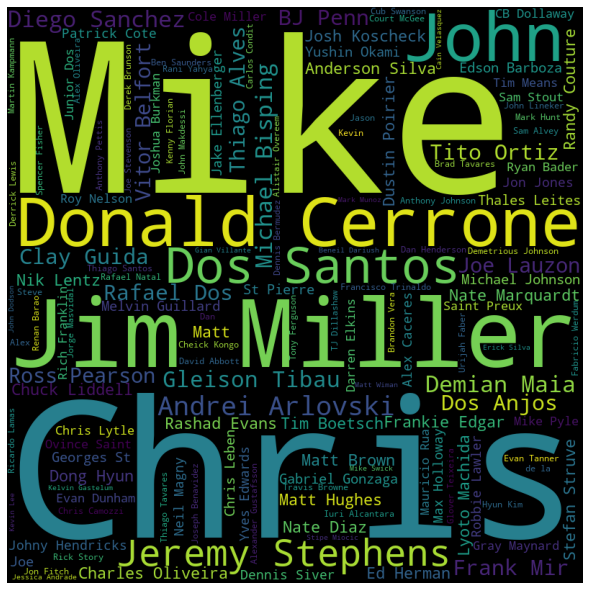

In [47]:
#thống kê cường độ xuất hiện tên của người winner 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(names) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [10]:
#các hạng cân thi đấu
raw_data['weight_class'].unique()

array(['Bantamweight', "Women's Flyweight", 'Lightweight', 'Heavyweight',
       "Women's Strawweight", 'Featherweight', 'Middleweight',
       'Light Heavyweight', 'Welterweight', "Women's Bantamweight",
       "Women's Featherweight", 'Flyweight', 'Catch Weight',
       'Open Weight'], dtype=object)

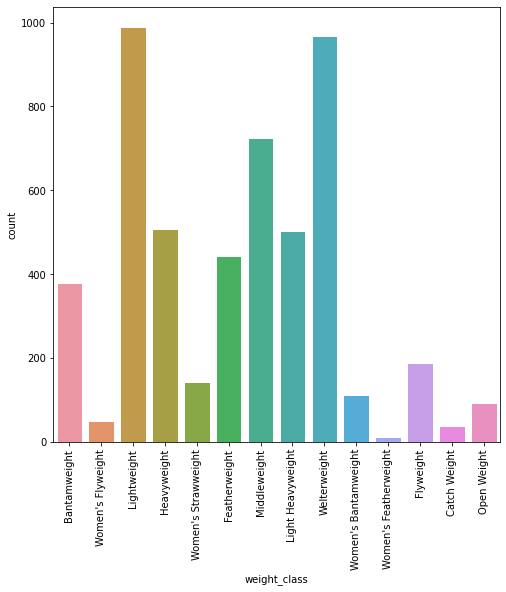

In [11]:
#visualize số lượng trận thi đấu trên các hạng cân thi đấu 
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=raw_data['weight_class'], data=raw_data)

In [12]:
stances = pd.concat([raw_data['R_Stance'], raw_data['B_Stance']], ignore_index=True)
st_values = stances.value_counts().sort_values(ascending=False).head(10)
st_labels = st_values.index

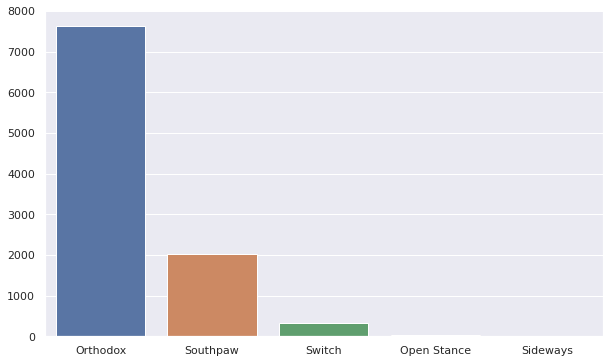

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(y=st_values, x=st_labels)

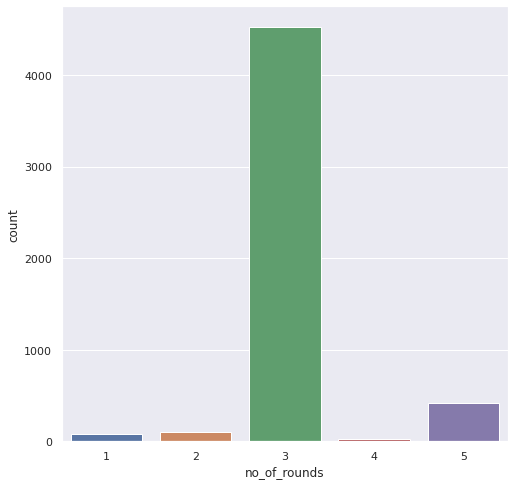

In [14]:
plt.figure(figsize=(8,8))
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=raw_data['no_of_rounds'], data=raw_data)

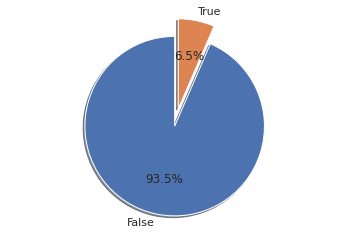

In [16]:
countsT = raw_data['title_bout'].value_counts()
labels = 'False' ,'True'
sizes = countsT.values
explode = (0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

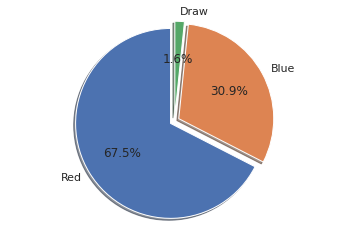

In [53]:
countsT = raw_data['Winner'].value_counts()
labels = ['Red' ,'Blue', 'Draw']
sizes = countsT.values
explode = (0.05, 0.05, 0.05) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [54]:
raw_data['country'] = raw_data['location'].apply(lambda x : x.split(',')[-1])

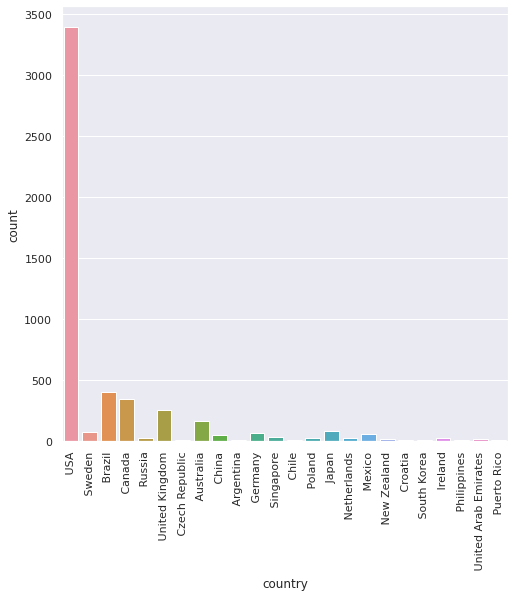

In [19]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=raw_data['country'], data=raw_data)

In [20]:
values = fighters.value_counts().sort_values(ascending=False).head(10)
labels = values.index

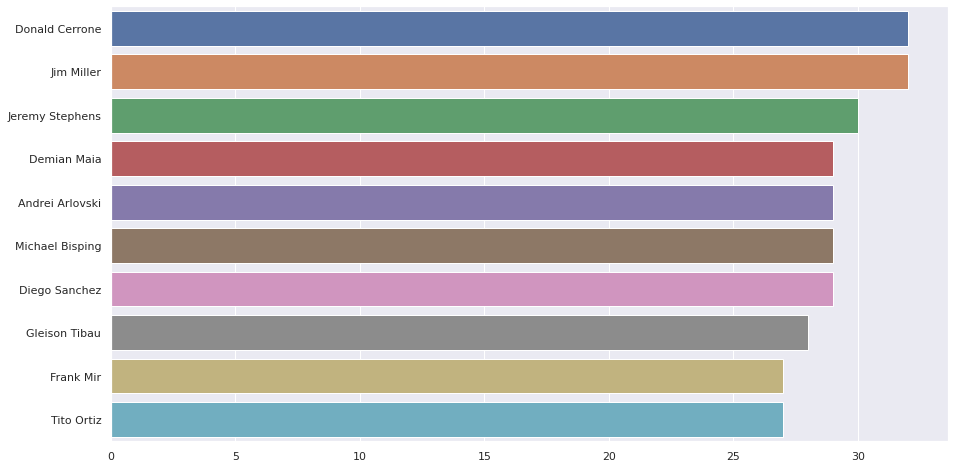

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x=values, y=labels)

In [22]:
raw_data['year'] = raw_data['date'].apply(lambda x : x.split('-')[0])

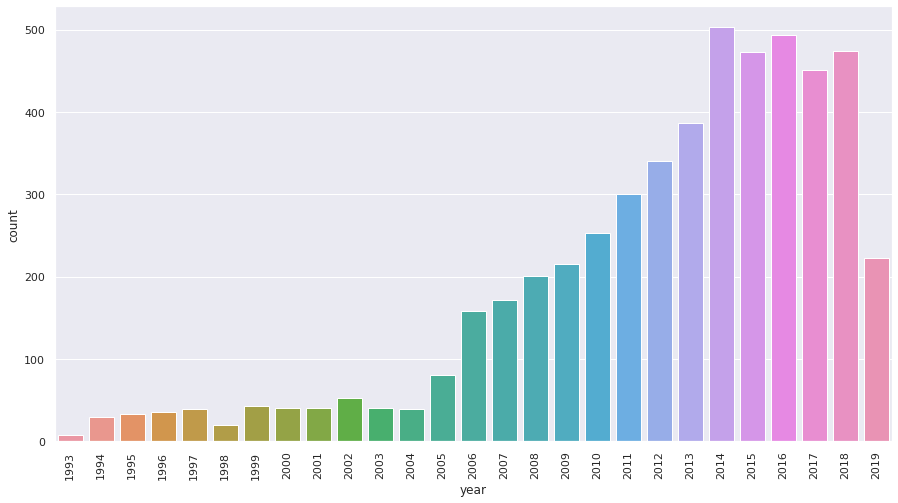

In [23]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=raw_data['year'], data=raw_data)

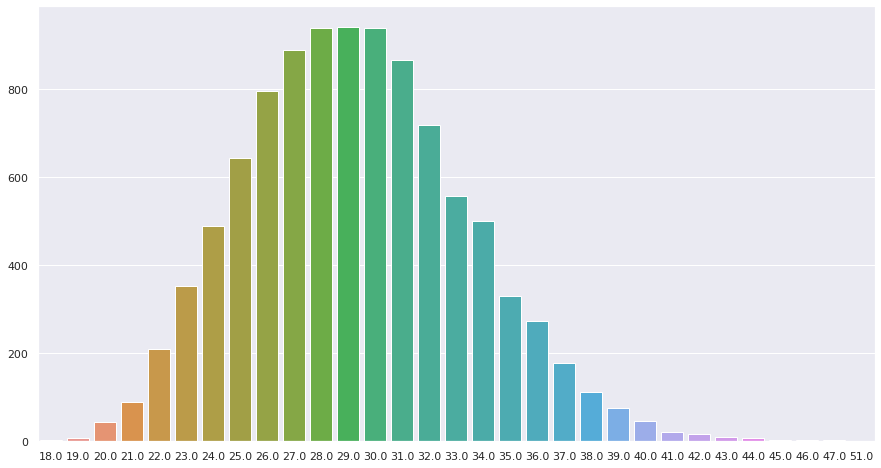

In [24]:
age = pd.concat([raw_data['R_age'], raw_data['B_age']], ignore_index=True)
age_values = age.value_counts()
age_labels = age_values.index
plt.figure(figsize=(15,8))
sns.barplot(x=age_labels,y=age_values)